# Pandas Groupby & Aggregates

## Introduction

In [1]:
import pandas as pd

In [2]:
carstocks = pd.read_csv("car_stocks.csv")

In [3]:
carstocks

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,RIVN,2021-11-10,106.750000,119.459999,95.199997,100.730003,100.730003,103679500
1,RIVN,2021-11-11,114.625000,125.000000,108.010002,122.989998,122.989998,83668200
2,RIVN,2021-11-12,128.645004,135.199997,125.250000,129.949997,129.949997,50437500
3,RIVN,2021-11-15,130.800003,152.529999,127.510002,149.360001,149.360001,64982300
4,RIVN,2021-11-16,163.800003,179.470001,153.779999,172.009995,172.009995,94036600
5,RIVN,2021-11-17,160.880005,163.000000,140.350006,146.070007,146.070007,71765600
6,RIVN,2021-11-18,136.809998,138.779999,120.150002,123.379997,123.379997,63603600
7,RIVN,2021-11-19,129.979996,139.899994,125.599998,128.600006,128.600006,49368200
8,RIVN,2021-11-22,123.879997,124.930000,106.910004,118.110001,118.110001,40993900
9,RIVN,2021-11-23,117.830002,124.000000,113.000000,119.849998,119.849998,24967900


### Exemple
Pour calculer la moyenne de la colonne "Close" par rapport à chaque symbole de stock il faut passer par les étapes suivantes : 

In [4]:
carstocks[carstocks["Symbol"] == "GM"]["Close"].mean()

62.16461546153845

In [5]:
carstocks[carstocks["Symbol"] == "LCID"]["Close"].mean()

49.82923061538462

In [6]:
carstocks[carstocks["Symbol"] == "RIVN"]["Close"].mean()

127.52307653846154

## Groupby
Pandas groupby est utilisé pour regrouper les données selon les catégories et appliquer une fonction aux catégories. Cela aide également à agréger efficacement les données.

La fonction Pandas dataframe.groupby() est utilisée pour diviser les données en groupes en fonction de certains critères. Les objets pandas peuvent être divisés sur n'importe quel axe ( lignes ou colonnes). La définition abstraite du groupement est de fournir un mappage des étiquettes aux noms de groupe.

In [7]:
carstocks.groupby("Symbol")["Close"].mean()

Symbol
GM       62.164615
LCID     49.829231
RIVN    127.523077
Name: Close, dtype: float64

In [8]:
titanic = pd.read_csv("titanic.csv")
titanic['age'] = titanic["age"].replace(['?'], [None]).astype('float')

In [9]:
df = titanic[["pclass", "survived", "sex", "age"]]
df

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000
...,...,...,...,...
1304,3,0,female,14.5000
1305,3,0,female,NaN
1306,3,0,male,26.5000
1307,3,0,male,27.0000


In [10]:
gbo = df.groupby(by="sex")

In [11]:
gbo

In [12]:
gbo["age"]

In [13]:
gbo["age"].mean()

sex
female    28.687071
male      30.585233
Name: age, dtype: float64

In [14]:
gbo["age"].max()

sex
female    76.0
male      80.0
Name: age, dtype: float64

<AxesSubplot:title={'center':'Average Age By Sex'}, xlabel='sex'>

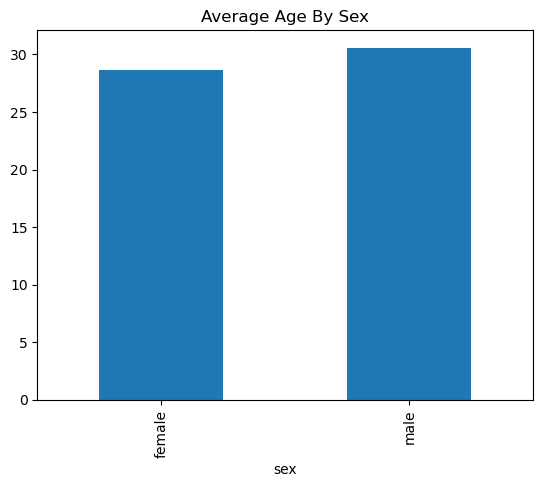

In [15]:
gbo["age"].mean().plot(kind="bar", title="Average Age By Sex")

In [16]:
titanic.groupby("pclass")["age"].mean()

pclass
1    39.159918
2    29.506705
3    24.816367
Name: age, dtype: float64

In [17]:
titanic.groupby("sex")["pclass"].mean()

sex
female    2.154506
male      2.372479
Name: pclass, dtype: float64

In [59]:
titanic.groupby("sex", as_index= False).mean()
#as_index par défaut est Vrai

,sex,pclass,survived,age,sibsp,parch
0,female,2.154506,0.727468,28.687071,0.652361,0.633047
1,male,2.372479,0.190985,30.585233,0.413998,0.247924


In [19]:
titanic.groupby("sex").median()

,pclass,survived,age,sibsp,parch
sex,,,,,
female,2.0,1.0,27.0,0.0,0.0
male,3.0,0.0,28.0,0.0,0.0


In [20]:
carstocks.groupby("Symbol")["High"].max()

Symbol
GM       65.180000
LCID     57.750000
RIVN    179.470001
Name: High, dtype: float64

### GroupBy.groups

Retourne un dictionnaire contenant les noms de groupes avec leurs labels.

``Dict {group name -> group labels}``.

In [21]:
gbo.groups

{'female': [0, 2, 4, 6, 8, 11, 12, 13, 17, 18, 21, 23, 24, 27, 28, 32, 33, 35, 36, 41, 42, 43, 44, 48, 50, 55, 57, 59, 61, 63, 65, 66, 67, 69, 72, 73, 76, 78, 79, 82, 83, 85, 88, 90, 92, 95, 97, 98, 99, 102, 103, 104, 105, 107, 108, 111, 112, 113, 116, 117, 121, 122, 124, 127, 129, 130, 131, 134, 137, 139, 141, 144, 146, 149, 153, 155, 159, 160, 161, 163, 167, 168, 169, 176, 178, 180, 181, 182, 186, 187, 188, 190, 192, 193, 195, 198, 199, 204, 207, 208, ...], 'male': [1, 3, 5, 7, 9, 10, 14, 15, 16, 19, 20, 22, 25, 26, 29, 30, 31, 34, 37, 38, 39, 40, 45, 46, 47, 49, 51, 52, 53, 54, 56, 58, 60, 62, 64, 68, 70, 71, 74, 75, 77, 80, 81, 84, 86, 87, 89, 91, 93, 94, 96, 100, 101, 106, 109, 110, 114, 115, 118, 119, 120, 123, 125, 126, 128, 132, 133, 135, 136, 138, 140, 142, 143, 145, 147, 148, 150, 151, 152, 154, 156, 157, 158, 162, 164, 165, 166, 170, 171, 172, 173, 174, 175, 177, 179, 183, 184, 185, 189, 191, ...]}

### GroupBy.get_group
Construit un DataFrame à partir du groupe avec le nom fourni.

In [22]:
gbo.get_group("female")

,pclass,survived,sex,age
0,1,1,female,29.0
2,1,0,female,2.0
4,1,0,female,25.0
6,1,1,female,63.0
8,1,1,female,53.0
...,...,...,...,...
1286,3,1,female,38.0
1290,3,1,female,47.0
1300,3,1,female,15.0
1304,3,0,female,14.5


In [23]:
gbo.get_group("male")

,pclass,survived,sex,age
1,1,1,male,0.9167
3,1,0,male,30.0000
5,1,1,male,48.0000
7,1,0,male,39.0000
9,1,0,male,71.0000
...,...,...,...,...
1302,3,0,male,NaN
1303,3,0,male,NaN
1306,3,0,male,26.5000
1307,3,0,male,27.0000


### Grouper

Un groupeur permet à l'utilisateur de spécifier une instruction groupby pour un objet.

Cette spécification sélectionnera une colonne via le paramètre key, ou si les paramètres level et/ou axis sont donnés, un niveau de l'index de l'objet cible.

Si axis et/ou level sont passés comme mots clés à Grouper et groupby, les valeurs passées à Grouper sont prioritaires.

In [24]:
carstocks

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,RIVN,2021-11-10,106.750000,119.459999,95.199997,100.730003,100.730003,103679500
1,RIVN,2021-11-11,114.625000,125.000000,108.010002,122.989998,122.989998,83668200
2,RIVN,2021-11-12,128.645004,135.199997,125.250000,129.949997,129.949997,50437500
3,RIVN,2021-11-15,130.800003,152.529999,127.510002,149.360001,149.360001,64982300
4,RIVN,2021-11-16,163.800003,179.470001,153.779999,172.009995,172.009995,94036600
5,RIVN,2021-11-17,160.880005,163.000000,140.350006,146.070007,146.070007,71765600
6,RIVN,2021-11-18,136.809998,138.779999,120.150002,123.379997,123.379997,63603600
7,RIVN,2021-11-19,129.979996,139.899994,125.599998,128.600006,128.600006,49368200
8,RIVN,2021-11-22,123.879997,124.930000,106.910004,118.110001,118.110001,40993900
9,RIVN,2021-11-23,117.830002,124.000000,113.000000,119.849998,119.849998,24967900


Dans l'exemple suivant nous allons calculer la moyenne 
de toutes les colonnes du dataframe/symbole( Grouped by symbol)

In [25]:
carstocks.groupby(pd.Grouper(key="Symbol")).mean()

,Open,High,Low,Close,Adj Close,Volume
Symbol,,,,,,
RIVN,127.710000,135.309230,119.150000,127.523077,127.523077,5.252395e+07
LCID,48.761538,51.811538,46.442539,49.829231,49.829231,1.081098e+08
GM,61.937693,63.129231,61.051539,62.164615,62.164615,2.025259e+07


In [26]:
carstocks.Date=pd.to_datetime(carstocks.Date)

In [66]:
carstocks.groupby(pd.Grouper(key="Date", freq='SM')).max()

,Symbol,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2021-10-31,RIVN,128.645004,135.199997,125.250000,129.949997,129.949997,103679500
2021-11-15,RIVN,163.800003,179.470001,153.779999,172.009995,172.009995,248654600


## Agg
La méthode agg() permet d'appliquer une fonction ou une liste de noms de fonctions à exécuter le long d'un des axes du DataFrame, par défaut 0, qui est l'axe des index (lignes).

In [28]:
titanic.groupby("sex")["age"].agg(["min"])

,min
sex,
female,0.1667
male,0.3333


In [29]:
titanic.groupby("sex")["age"].agg(["min", "max", "mean", "median"])

,min,max,mean,median
sex,,,,
female,0.1667,76.0,28.687071,27.0
male,0.3333,80.0,30.585233,28.0


In [30]:
titanic.groupby("sex").agg(["min", "max"])

pclass     survived                                  name  \
          min max      min max                               min   
sex                                                                
female      1   3        0   1  Abbott, Mrs. Stanton (Rosa Hunt)   
male        1   3        0   1               Abbing, Mr. Anthony   

                                                          age       sibsp      \
                                                  max     min   max   min max   
sex                                                                             
female  del Carlo, Mrs. Sebastiano (Argenia Genovesi)  0.1667  76.0     0   8   
male                      van Melkebeke, Mr. Philemon  0.3333  80.0     0   8   

        ... cabin     embarked     boat     body     home.dest  \
        ...   min max      min max  min max  min max       min   
sex     ...                                                      
female  ...     ?  G6        ?   S    1   D  206   ?         ?   
male    ...     ?   T        C   S    1   D    1   ?         ?   

                             
                        max  
sex                          
female  Zurich, Switzerland  
male    Zurich, Switzerland  

[2 rows x 26 columns]

In [31]:
titanic.groupby("sex").agg({"age": ["min", "max"], "pclass": "mean"})

age          pclass
           min   max      mean
sex                           
female  0.1667  76.0  2.154506
male    0.3333  80.0  2.372479

In [33]:
carstocks.groupby("Symbol").agg({"Open": "mean", "Close": "mean", "Volume": ["mean", "sum"]})

Open       Close        Volume            
              mean        mean          mean         sum
Symbol                                                  
GM       61.937693   62.164615  2.025259e+07   263283700
LCID     48.761538   49.829231  1.081098e+08  1405427200
RIVN    127.710000  127.523077  5.252395e+07   682811400

In [36]:
def range(s):
    return s.max() - s.min()
    
titanic.groupby("pclass")["age"].agg(["min", "max", range])

,min,max,range
pclass,,,
1,0.9167,80.0,79.0833
2,0.6667,70.0,69.3333
3,0.1667,74.0,73.8333


In [37]:
titanic["age"].size

1309

In [38]:
titanic["age"].count()

1046

In [39]:
titanic["age"].size - titanic["age"].count()

263

In [41]:
def count_nulls(s):
    return s.size - s.count()

titanic.groupby("pclass")["age"].agg(count_nulls)

pclass
1     39
2     16
3    208
Name: age, dtype: int64

In [42]:
carstocks.groupby("Symbol").agg(
    min_open=("Open", "min"),
    max_open=("Open", "max"),
    min_close=("Close", "min"),
    max_close=("Close", "max")
)

,min_open,max_open,min_close,max_close
Symbol,,,,
GM,57.849998,64.330002,59.270000,64.610001
LCID,42.299999,56.200001,40.750000,55.520000
RIVN,106.750000,163.800003,100.730003,172.009995


In [68]:
carstocks.groupby("Symbol").agg({"Open": ["min", "max"],"Close": ["min", "max"]})

Open                   Close            
               min         max         min         max
Symbol                                                
GM       57.849998   64.330002   59.270000   64.610001
LCID     42.299999   56.200001   40.750000   55.520000
RIVN    106.750000  163.800003  100.730003  172.009995

In [44]:
carstocks.groupby("Symbol",as_index=False).agg({
    "Open": ["min", "max"],
    "Close": ["min", "max"], 
})

Symbol        Open                   Close            
                 min         max         min         max
0     GM   57.849998   64.330002   59.270000   64.610001
1   LCID   42.299999   56.200001   40.750000   55.520000
2   RIVN  106.750000  163.800003  100.730003  172.009995

In [45]:
carstocks.groupby("Symbol").agg({
    "Open": ["min", "max"],
    "Close": ["min", "max"]
})

Open                   Close            
               min         max         min         max
Symbol                                                
GM       57.849998   64.330002   59.270000   64.610001
LCID     42.299999   56.200001   40.750000   55.520000
RIVN    106.750000  163.800003  100.730003  172.009995

## Regroupement par plusieurs colonnes et plusieurs index

In [46]:
titanic.groupby("sex")["age"].mean()

sex
female    28.687071
male      30.585233
Name: age, dtype: float64

In [47]:
group=titanic.groupby(["pclass", "sex", "survived"])[["age"]].mean()
group

age
pclass sex    survived           
1      female 0         35.200000
              1         37.109375
       male   0         43.658163
              1         36.168240
2      female 0         34.090909
              1         26.711051
       male   0         33.092593
              1         17.449274
3      female 0         23.418750
              1         20.814815
       male   0         26.679598
              1         22.436441

In [48]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1309 non-null   object 
 9   cabin      1309 non-null   object 
 10  embarked   1309 non-null   object 
 11  boat       1309 non-null   object 
 12  body       1309 non-null   object 
 13  home.dest  1309 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 143.3+ KB


In [49]:
titanic.groupby(["sex", "pclass"]).mean()

survived        age     sibsp     parch
sex    pclass                                         
female 1       0.965278  37.037594  0.555556  0.472222
       2       0.886792  27.499191  0.500000  0.650943
       3       0.490741  22.185307  0.791667  0.731481
male   1       0.340782  41.029250  0.340782  0.279330
       2       0.146199  30.815401  0.327485  0.192982
       3       0.152130  25.962273  0.470588  0.255578

In [50]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [51]:
df = titanic.groupby(["sex", "pclass"]).mean()

In [52]:
df

survived        age     sibsp     parch
sex    pclass                                         
female 1       0.965278  37.037594  0.555556  0.472222
       2       0.886792  27.499191  0.500000  0.650943
       3       0.490741  22.185307  0.791667  0.731481
male   1       0.340782  41.029250  0.340782  0.279330
       2       0.146199  30.815401  0.327485  0.192982
       3       0.152130  25.962273  0.470588  0.255578

In [53]:
df.loc[[("male", 3)]]

,,survived,age,sibsp,parch
sex,pclass,,,,
male,3,0.15213,25.962273,0.470588,0.255578


In [54]:
titanic.loc[[1,2]]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [55]:
df.loc[[("female", 3), ("male", 1)]]

,,survived,age,sibsp,parch
sex,pclass,,,,
female,3,0.490741,22.185307,0.791667,0.731481
male,1,0.340782,41.029250,0.340782,0.279330
